<a href="https://colab.research.google.com/github/Yuji-ONUKI/GCI2020_Winter/blob/main/Upload_CSV_Exec_Toyoda_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

早稲田大学豊田研究室からRスクリプトをダウンロードし、文字コードをutf-8に変更します。


In [66]:

!rm 放送大学心理統計17/*.pdf
!rm 放送大学心理統計17/Astan219/stan/*.*
!rm 放送大学心理統計17/Astan219/myfunc/*.*
!rm 放送大学心理統計17/Astan219/scrB/*.*
!rm 放送大学心理統計17/Astan219/scrB/*.pdf
!rm 放送大学心理統計17/Astan219/scrB/*.txt
!rmdir 放送大学心理統計17/Astan219/scrB
!rmdir 放送大学心理統計17/Astan219/myfunc
!rmdir 放送大学心理統計17/Astan219/stan
!rm 放送大学心理統計17/Astan219/*.*
!rmdir 放送大学心理統計17/Astan219
!rmdir 放送大学心理統計17
!rm ShinriTokei17.zip

rm: cannot remove '放送大学心理統計17/Astan219/scrB/*.pdf': No such file or directory
rm: cannot remove '放送大学心理統計17/Astan219/scrB/*.txt': No such file or directory


最初のセルを実行した後、必要な章のセルを実行してください。


In [67]:
import requests
url='http://www.waseda.jp/sem-toyoda-lab/data/%E6%94%BE%E9%80%81%E5%A4%A7%E5%AD%A6%E5%BF%83%E7%90%86%E7%B5%B1%E8%A8%8817.zip'
response = requests.get(url)
open("toyoda.zip", "wb").write(response.content)
!unzip -Ocp932 toyoda.zip
!rm toyoda.zip
!find /content/放送大学心理統計17/Astan219/myfunc -name "*.R" -exec bash -c 'echo {} && iconv -t utf8 -f sjis {} > {}.new && mv {}.new {}' \;
!find /content/放送大学心理統計17/Astan219/myfunc -name "*.R" -exec bash -c 'echo {} && sed "s/\.R/\.R'\'',encoding='\''utf-8/" {} > {}.new && mv {}.new {}' \;
!find /content/放送大学心理統計17/Astan219/myfunc -name "Reg.R" -exec bash -c 'echo {} && sed "s/R.,encoding=.utf-8eg/Reg/" {} > {}.new && mv {}.new {}' \;

!find /content/放送大学心理統計17/Astan219/scrB -name "*.R" -exec bash -c 'echo {} && iconv -t utf8 -f sjis {} > {}.new && mv {}.new {}' \;
!find /content/放送大学心理統計17/Astan219/scrB -name "*.R" -exec bash -c 'echo {} && sed "s/\.R/\.R'\'',encoding='\''utf-8/" {} > {}.new && mv {}.new {}' \;

!find /content/放送大学心理統計17/Astan219/scrB -name "*.csv" -exec bash -c 'echo {} && iconv -t utf8 -f sjis {} > {}.new && mv {}.new {}' \;
!find /content/放送大学心理統計17/Astan219/stan -name "*.stan" -exec bash -c 'echo {} && iconv -t utf8 -f sjis {}  > {}.new && mv {}.new {}' \;
!find /content/放送大学心理統計17/Astan219/stan -name "*.stan" -exec bash -c 'echo {} && sed "s/‾/~/g" {} > {}.new && mv {}.new {}' \;
!find /content/放送大学心理統計17/Astan219 -name "*.txt" -exec bash -c 'echo {} && iconv -t utf8 -f sjis {} > {}.new && mv {}.new {}' \;
!zip -r ShinriTokei17.zip /content/放送大学心理統計17
from google.colab import files
#files.download('ShinriTokei17.zip')
#!rm ShinriTokei17.zip

Archive:  toyoda.zip
   creating: 放送大学心理統計17/Astan219/
   creating: 放送大学心理統計17/Astan219/myfunc/
  inflating: 放送大学心理統計17/Astan219/myfunc/alpha.co.R  
  inflating: 放送大学心理統計17/Astan219/myfunc/Bi01.R  
  inflating: 放送大学心理統計17/Astan219/myfunc/Bi02.R  
  inflating: 放送大学心理統計17/Astan219/myfunc/Bi03.R  
  inflating: 放送大学心理統計17/Astan219/myfunc/con_hist.R  
  inflating: 放送大学心理統計17/Astan219/myfunc/cumcurve.R  
  inflating: 放送大学心理統計17/Astan219/myfunc/disc.co.R  
  inflating: 放送大学心理統計17/Astan219/myfunc/E1Ind.R  
  inflating: 放送大学心理統計17/Astan219/myfunc/E2Ind.R  
  inflating: 放送大学心理統計17/Astan219/myfunc/G1mean.R  
  inflating: 放送大学心理統計17/Astan219/myfunc/G2Ind.R  
  inflating: 放送大学心理統計17/Astan219/myfunc/G2pair.R  
  inflating: 放送大学心理統計17/Astan219/myfunc/gqcal.R  
  inflating: 放送大学心理統計17/Astan219/myfunc/Mu01.R  
  inflating: 放送大学心理統計17/Astan219/myfunc/Mu02.R  
  inflating: 放送大学心理統計17/Astan219/myfunc/myfunc.R  
  inflating: 放送大学心理統計17/Astan219/myfunc/phc01.R  
  inflating: 放送大学心理統計17/Astan219/myfunc/phc02

ここから、Rスクリプトを実行してみます。


# CSVファイルを読み込む方法 第3章スクリプトのケース
ファイルメニューからcsvファイルをドライブのscrBディレクトリにアップロードしておきます。そのファイル名はtest.csvだったとします。

In [ ]:
!apt-get install -y fonts-noto-cjk

In [ ]:
import rpy2
%load_ext rpy2.ipython

In [ ]:
%%R
library(ggplot2)
par(family = "NotoSansCJKkr-Bold")
theme(base_family = "NotoSansCJKkr-Bold")

setwd('/content/放送大学心理統計17/Astan219')
install.packages('rstan')
#第3章用スクリプト
getwd()                        #working directoryの確認
source('myfunc/myfunc.R')      #自作関数の読み込み
library(rstan)                 #パッケージrstanの呼び出し
rstan_options(auto_write=T)
options(mc.cores=parallel::detectCores())

#表1.1の「知覚時間」のデータ入力
#x<-c(31.43,31.09,33.38,30.49,29.62,
#     35.40,32.58,28.96,29.43,28.52,
#     25.39,32.68,30.51,30.15,32.33,
#     30.43,32.50,32.07,32.35,31.57)
# データを入力している上の4行をコメントアウトして下の2行に差し替えました。
library(tidyverse)
x <- read_csv('scrB/test.csv')

out <-G1mean(x,prior=F, fi=NA)#正規分布に関する推測
#図3.1 トレースプロット
traceplot(out$fit, inc_warmup = F, pars=c("mu","sigma"))
out2<-print(out,2)            #表3.1, 表3.2

hist(out$mu,breaks=100)       #図3.3 平均の事後分布
hist(out$sigma,breaks=100)    #図3.4 sdの事後分布
hist(out$xaste,breaks=100)    #図3.5 事後予測分布



# CSVファイルを読み込む方法　第４章スクリプトのケース

In [ ]:
!apt-get install -y fonts-noto-cjk

In [ ]:
import rpy2
%load_ext rpy2.ipython

In [ ]:
%%R
library(ggplot2)
par(family = "NotoSansCJKkr-Bold")
theme(base_family = "NotoSansCJKkr-Bold")

setwd('/content/放送大学心理統計17/Astan219')
install.packages('rstan')
#第4章用スクリプト
getwd()                        #working directoryの確認
source('myfunc/myfunc.R')      #自作関数の読み込み
library(rstan)                 #パッケージrstanの呼び出し
rstan_options(auto_write=T)
options(mc.cores=parallel::detectCores())

#表1.1の「知覚時間」のデータ入力
x<-c(31.43,31.09,33.38,30.49,29.62,
     35.40,32.58,28.96,29.43,28.52,
     25.39,32.68,30.51,30.15,32.33,
     30.43,32.50,32.07,32.35,31.57)
# データを入力している上の4行をコメントアウトして下の2行に差し替えました。
library(tidyverse)
x <- read_csv('scrB/test.csv')

out <-G1mean(x,prior=F, fi=NA) #平均値等に関する推測
out2<-print(out,degits=2,cr1=30,cr2a=30.5,cr2b=29.5,
             cr3=30,cr4=30,cr5=0.5,pr1=0.25,pr2=0.2)

#各種事後分布
hist(out2$G[,1],breaks=100)       #図4.1
hist(out2$G[,2],breaks=100)       #図4.2
hist(out2$G[,3],breaks=100)       #図4.3
hist(out2$G[,4],breaks=100)       #図4.4
hist(out2$G[,5],breaks=100)       #図4.5
hist(out2$G[,6],breaks=100)       #図4.6


# 第1章

In [ ]:
!apt-get install -y fonts-noto-cjk

In [ ]:
import rpy2
%load_ext rpy2.ipython


In [ ]:
%%R
f <- systemfonts::system_fonts()
f$name

In [ ]:
%%R
library(ggplot2)
par(family = "NotoSansCJKkr-Bold")
theme(base_family = "NotoSansCJKkr-Bold")
setwd('/content/放送大学心理統計17/Astan219')
source(file='scrB/chapter01.R')

[1] 31.044
[1] 4.275
[1] 2.068


# 第２章

In [ ]:
!apt-get install -y fonts-noto-cjk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-noto-cjk is already the newest version (1:20190409+repack1-0ubuntu0.18.04).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
import rpy2
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


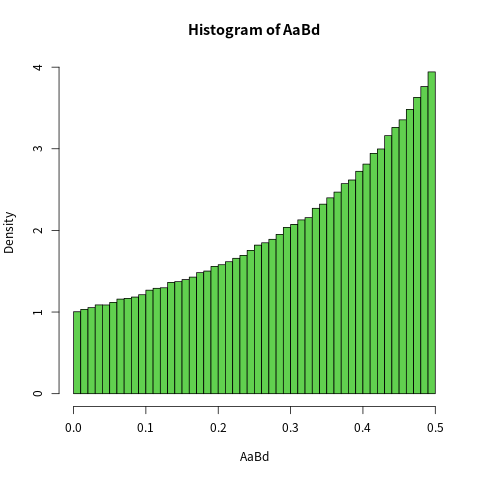

In [ ]:
%%R
library(ggplot2)
par(family = "NotoSansCJKkr-Bold")
theme(base_family = "NotoSansCJKkr-Bold")
setwd('/content/放送大学心理統計17/Astan219')
source(file='scrB/chapter02.R')

# 第３章

In [ ]:
!apt-get install -y fonts-noto-cjk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 55.7 MB of archives.
After this operation, 92.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 fonts-noto-cjk all 1:20190409+repack1-0ubuntu0.18.04 [55.7 MB]
Fetched 55.7 MB in 3s (17.0 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20190409+repack1-0ubuntu0.18.04_all.deb ...
Unpacking fonts-noto-cjk (1:20190409+repack1-0ubuntu0.18.04) ...
Setting up fonts-noto-cjk (1:20190409+repack1-0ubuntu0

In [ ]:
import rpy2
%load_ext rpy2.ipython


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [ ]:
%%R
library(ggplot2)
par(family = "NotoSansCJKkr-Bold")
theme(base_family = "NotoSansCJKkr-Bold")

setwd('/content/放送大学心理統計17/Astan219')
install.packages('rstan')
source(file='scrB/chapter03.R')

# 第４章

In [ ]:
!apt-get install -y fonts-noto-cjk

In [ ]:
import rpy2
%load_ext rpy2.ipython


In [ ]:
%%R
library(ggplot2)
par(family = "NotoSansCJKkr-Bold")
theme(base_family = "NotoSansCJKkr-Bold")

setwd('/content/放送大学心理統計17/Astan219')
install.packages('rstan')
source(file='scrB/chapter04.R')

# 第５章

In [ ]:
!apt-get install -y fonts-noto-cjk

In [ ]:
import rpy2
%load_ext rpy2.ipython


In [ ]:
%%R
library(ggplot2)
par(family = "NotoSansCJKkr-Bold")
theme(base_family = "NotoSansCJKkr-Bold")

setwd('/content/放送大学心理統計17/Astan219')
install.packages('rstan')
source(file='scrB/chapter05.R')

# 第７章


In [ ]:
!apt-get install -y fonts-noto-cjk

In [ ]:
import rpy2
%load_ext rpy2.ipython


In [ ]:
%%R
library(ggplot2)
par(family = "NotoSansCJKkr-Bold")
theme(base_family = "NotoSansCJKkr-Bold")

setwd('/content/放送大学心理統計17/Astan219')
install.packages('rstan')
source(file='scrB/chapter07.R')

# 第９章


In [ ]:
!apt-get install -y fonts-noto-cjk

In [ ]:
import rpy2
%load_ext rpy2.ipython


In [ ]:
%%R
library(ggplot2)
par(family = "NotoSansCJKkr-Bold")
theme(base_family = "NotoSansCJKkr-Bold")

setwd('/content/放送大学心理統計17/Astan219')
install.packages('rstan')
source(file='scrB/chapter09.R')

# 第10章


In [ ]:
!apt-get install -y fonts-noto-cjk

In [ ]:
import rpy2
%load_ext rpy2.ipython


In [ ]:
%%R
library(ggplot2)
par(family = "NotoSansCJKkr-Bold")
theme(base_family = "NotoSansCJKkr-Bold")

setwd('/content/放送大学心理統計17/Astan219')
install.packages('rstan')
source(file='scrB/chapter10.R')

# 第11章


In [ ]:
!apt-get install -y fonts-noto-cjk

In [ ]:
import rpy2
%load_ext rpy2.ipython


In [ ]:
%%R
library(ggplot2)
par(family = "NotoSansCJKkr-Bold")
theme(base_family = "NotoSansCJKkr-Bold")

setwd('/content/放送大学心理統計17/Astan219')
install.packages('rstan')
source(file='scrB/chapter11.R')

# 第12章


In [ ]:
!apt-get install -y fonts-noto-cjk

In [ ]:
import rpy2
%load_ext rpy2.ipython


In [ ]:
%%R
library(ggplot2)
par(family = "NotoSansCJKkr-Bold")
theme(base_family = "NotoSansCJKkr-Bold")

setwd('/content/放送大学心理統計17/Astan219')
install.packages('rstan')
source(file='scrB/chapter12.R')

# 第13章


In [ ]:
!apt-get install -y fonts-noto-cjk

In [ ]:
import rpy2
%load_ext rpy2.ipython


In [ ]:
%%R
library(ggplot2)
par(family = "NotoSansCJKkr-Bold")
theme(base_family = "NotoSansCJKkr-Bold")

setwd('/content/放送大学心理統計17/Astan219')
install.packages('rstan')
source(file='scrB/chapter13.R')

# 第14章


In [ ]:
!apt-get install -y fonts-noto-cjk

In [ ]:
import rpy2
%load_ext rpy2.ipython


R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘checkmate’, ‘matrixStats’, ‘StanHeaders’, ‘inline’, ‘gridExtra’, ‘Rcpp’, ‘RcppParallel’, ‘loo’, ‘RcppEigen’, ‘BH’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/checkmate_2.1.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 170034 bytes (166 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to consol

Inference for Stan model: Reg.
5 chains, each with iter=21000; warmup=1000; thin=1; 
post-warmup draws per chain=20000, total post-warmup draws=1e+05.

              mean se_mean      sd       2.5%         5%        50%        95%
a          0.54737 0.01494 2.99910   -5.36392   -4.38193    0.54830    5.47620
b[1]       0.00054 0.00001 0.00143   -0.00229   -0.00183    0.00054    0.00290
b[2]       0.01733 0.00001 0.00301    0.01141    0.01237    0.01733    0.02224
b[3]      -0.00151 0.00002 0.00361   -0.00859   -0.00742   -0.00152    0.00440
b[4]       0.01384 0.00003 0.00650    0.00111    0.00325    0.01383    0.02456
sigma      2.31162 0.00127 0.26339    1.86686    1.92550    2.28772    2.78109
r2         0.75044 0.00022 0.05271    0.62862    0.65432    0.75719    0.82415
r          0.86572 0.00013 0.03095    0.79285    0.80890    0.87016    0.90783
log_lik -105.28464 0.01042 1.89275 -109.89701 -108.88992 -104.92989 -102.90311
             97.5% n_eff    Rhat
a          6.43709 40311 

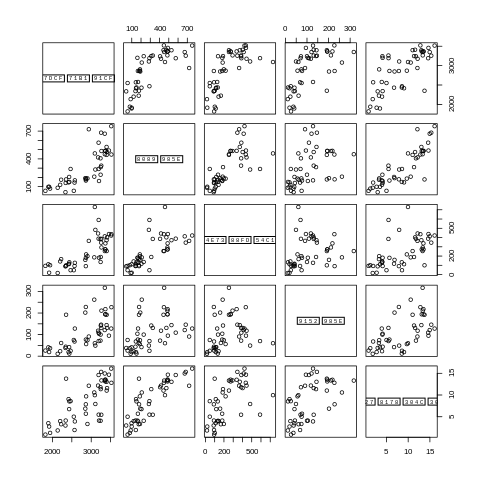

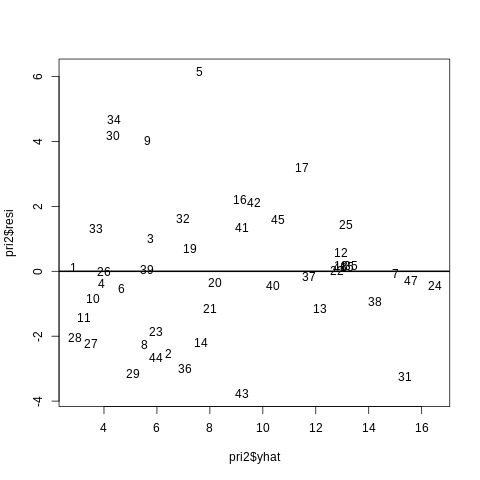

In [ ]:
%%R
library(ggplot2)
par(family = "NotoSansCJKkr-Bold")
theme(base_family = "NotoSansCJKkr-Bold")

setwd('/content/放送大学心理統計17/Astan219')
install.packages('rstan')
source(file='scrB/chapter14.R')